In [213]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from datetime import timedelta as delta
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy import stats

from matplotlib.lines import Line2D
import matplotlib.cm  as cm
import matplotlib.animation as animation

In [9]:
river_sources = np.load('../river_sources.npy', allow_pickle=True).item()

In [409]:
posterior_avg = np.load('../data/analysis/sa-S03/posterior_sa-S03_average30.npy', allow_pickle=True).item()
# likelihood_avg = np.load('../data/analysis/fail1/likelihood_average.npy', allow_pickle=True).item()
params = np.load('../data/analysis/sa-S03/params_sa-S03_average30.npy', allow_pickle=True).item()
posterior_avg_1500 = np.load('../data/analysis/sa-S03/posterior_sa-S03_average1500.npy', allow_pickle=True).item()
counts_avg = np.load('../data/analysis/sa-S03/counts_sa-S03_average30.npy', allow_pickle=True).item()


In [401]:
counts_avg_150

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

Text(0.1, 0.93, '4.1 years average')

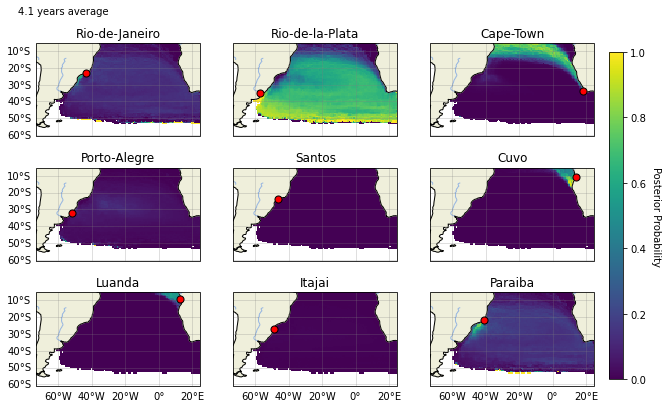

In [340]:
y,x = np.meshgrid(params['lat_range'], params['lon_range'])
t=0

labels=list(posterior_avg.keys())

fig,ax = plt.subplots(ncols=3,nrows=3,figsize=(10,6.5),
                      subplot_kw={'projection': ccrs.PlateCarree()}, sharey=True)

ax = ax.reshape(9)

for k, loc in enumerate(labels):
    
    z = posterior_avg_1500[loc][t] #np.ma.masked_array(prob[loc][t], mask=prob['dimensions']['mask'])
    
    ax[k].set_extent([-73.0, 24.916666,-60.916664, -5.0833335], crs=ccrs.PlateCarree())
    #ax[k].add_feature(cfeature.OCEAN)
    ax[k].add_feature(cfeature.LAND, zorder=1)
    ax[k].add_feature(cfeature.COASTLINE)
    ax[k].add_feature(cfeature.RIVERS)
    ax[k].set_title(loc)
    im = ax[k].pcolormesh(x,y,z,cmap='viridis', vmax=1)
    gl = ax[k].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)
    
    if k in [1,2,4,5,7,8]:
        gl.left_labels = False
        
    if k in [0,1,2,3,4,5]:
        gl.bottom_labels = False
        
    gl.top_labels = False
    gl.right_labels = False
    ax[k].scatter(river_sources[loc][1], river_sources[loc][0], 
               s=50, marker='o', color='red', edgecolors='k', zorder=3)

bar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=bar_ax, orientation='vertical')
cbar.set_label('Posterior Probability', rotation=270, labelpad=15)
# fig.text(0.1,0.93,f'Particle age = {t:0.0f} days')
fig.text(0.1,0.93,f'4.1 years average')

Text(0.1, 0.93, '4.1 years average')

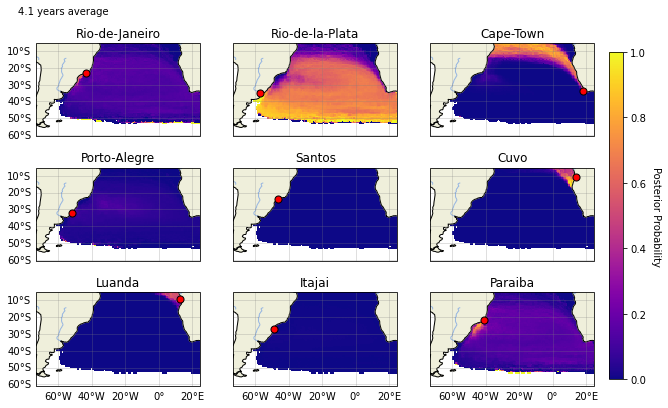

In [394]:
y,x = np.meshgrid(params['lat_range'], params['lon_range'])
t=0

labels=list(posterior_avg.keys())

fig,ax = plt.subplots(ncols=3,nrows=3,figsize=(10,6.5),
                      subplot_kw={'projection': ccrs.PlateCarree()}, sharey=True)

ax = ax.reshape(9)

for k, loc in enumerate(labels):
    
    z = posterior_avg_1500[loc][t] #np.ma.masked_array(prob[loc][t], mask=prob['dimensions']['mask'])
    
    ax[k].set_extent([-73.0, 24.916666,-60.916664, -5.0833335], crs=ccrs.PlateCarree())
    #ax[k].add_feature(cfeature.OCEAN)
    ax[k].add_feature(cfeature.LAND, zorder=1)
    ax[k].add_feature(cfeature.COASTLINE)
    ax[k].add_feature(cfeature.RIVERS)
    ax[k].set_title(loc)
    im = ax[k].pcolormesh(x,y,z,cmap='plasma', vmax=1)
    gl = ax[k].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)
    
    if k in [1,2,4,5,7,8]:
        gl.left_labels = False
        
    if k in [0,1,2,3,4,5]:
        gl.bottom_labels = False
        
    gl.top_labels = False
    gl.right_labels = False
    ax[k].scatter(river_sources[loc][1], river_sources[loc][0], 
               s=50, marker='o', color='red', edgecolors='k', zorder=3)

bar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=bar_ax, orientation='vertical')
cbar.set_label('Posterior Probability', rotation=270, labelpad=15)
# fig.text(0.1,0.93,f'Particle age = {t:0.0f} days')
fig.text(0.1,0.93,f'4.1 years average')

# time series

In [408]:
counts_avg_1500['Rio-de-Janeiro'].shape

(1, 120, 90)

Text(0.5, 0, 'Time (months)')

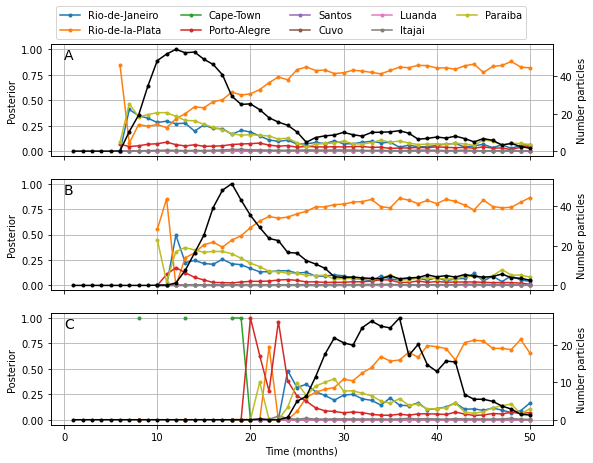

In [413]:
fig,ax = plt.subplots(ncols=1,nrows=3,figsize=(9,7),
                      sharex=True)

i_lon = 60
i_lat = 50
lat = params['lat_range'][i_lat]
lon = params['lon_range'][i_lon]
time = np.linspace(1,50, 50)

for loc in labels:
    
    ax[0].plot(time, posterior_avg[loc][:, 60, 50], '.-',label=loc)
    ax[1].plot(time, posterior_avg[loc][:, 90, 50], '.-',label=loc)
    ax[2].plot(time, posterior_avg[loc][:, 70, 70], '.-', label=loc)
    
ax02 = ax[0].twinx()
ax12 = ax[1].twinx()
ax22 = ax[2].twinx()
ax02.plot(time, counts_avg[loc][:, 60, 50], '.-',label=loc, c='k')
ax12.plot(time, counts_avg[loc][:, 90, 50], '.-',label=loc, c='k')
ax22.plot(time, counts_avg[loc][:, 70, 70], '.-',label=loc, c='k')
ax02.set_ylabel('Number particles')
ax12.set_ylabel('Number particles')
ax22.set_ylabel('Number particles')
# plt.xticks(rotation = 25)

for i in range(3):
    ax[i].set_ylabel('Posterior')
    ax[i].grid()
    ax[i].set_ylim(-0.05, 1.05)


ax[0].text(0, 0.9, 'A', fontsize=14)
ax[1].text(0, 0.9, 'B', fontsize=14)
ax[2].text(0, 0.9, 'C', fontsize=14)
ax[0].legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=5)
ax[2].set_xlabel('Time (months)')

In [ ]:
i_lon = 60
i_lat = 50
lat = params['lat_range'][i_lat]
lon = params['lon_range'][i_lon]
time = np.linspace(1,50, 50)

plt.figure(figsize=(8,4))
for loc in labels:
    
    plt.plot(time, posterior_avg[loc][:, i_lon, i_lat], label=loc)

# plt.xticks(rotation = 25)
plt.ylabel('Posterior probability')
plt.xlabel('Months')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title(f'Sampling location A ({lat:0.1f} lat, {lon:0.1f} lon)')
plt.grid()

# Beaching probability

Detect new coastal cells after computing the histogram?

In [312]:
post_beach = np.load('../data/analysis/posterior.npy', allow_pickle=True).item()
params_beach = np.load('../data/analysis/params.npy', allow_pickle=True).item()
counts = np.load('../data/analysis/counts.npy', allow_pickle=True).item()

Text(0.5, 1.0, 'America | Africa')

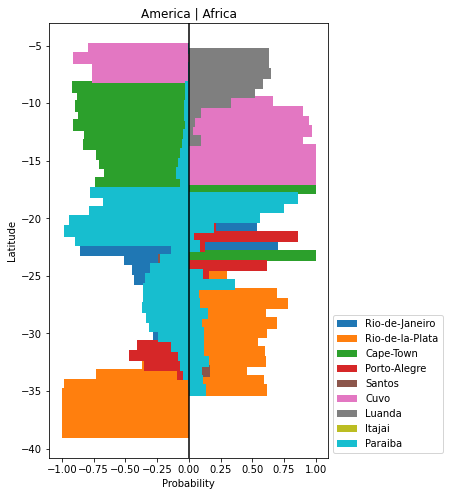

In [336]:
x_colors = np.linspace(0,1, 9)
colors = cm.get_cmap('tab10')(x_colors)

plt.figure(figsize=(5,8))
for k, loc in enumerate(labels):
    p1 = plt.barh(params_beach['lat_range_america'], -post_beach['America'][loc][0], 
             label=loc, align='edge', color=colors[k], height=1)
    plt.barh(params_beach['lat_range_africa'], post_beach['Africa'][loc][0], color=colors[k], height=1)

plt.axvline(0, color='k')
plt.legend(bbox_to_anchor=(1, 0))
plt.ylabel('Latitude')
plt.xlabel('Probability')
plt.title('America | Africa')

Text(0.5, 1.0, 'America | Africa')

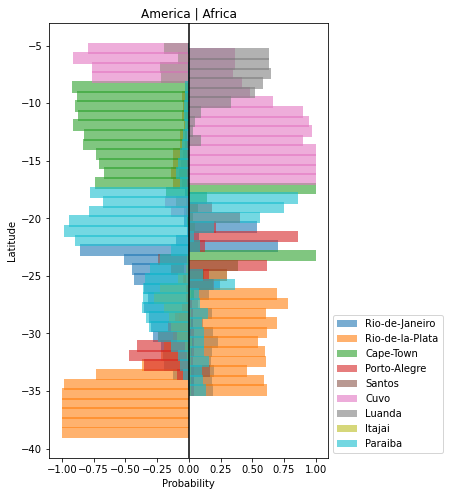

In [334]:
x_colors = np.linspace(0,1, 9)
colors = cm.get_cmap('tab10')(x_colors)

plt.figure(figsize=(5,8))
for k, loc in enumerate(labels):
    p1 = plt.barh(params_beach['lat_range_america'], -post_beach['America'][loc][0], 
             label=loc, align='edge', color=colors[k], alpha=0.6, height=1)
    plt.barh(params_beach['lat_range_africa'], post_beach['Africa'][loc][0], color=colors[k],
            alpha=0.6, height=1)

plt.axvline(0, color='k')
plt.legend(bbox_to_anchor=(1, 0))
plt.ylabel('Latitude')
plt.xlabel('Probability')
plt.title('America | Africa')

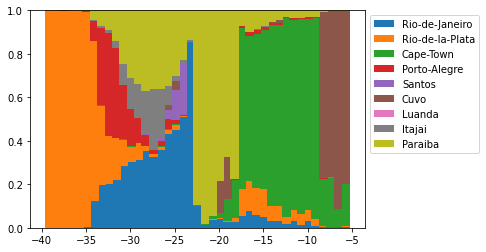

In [276]:
lower_margin = 0

for k, loc in enumerate(labels):
    plt.bar(params_beach['lat_range_america'], post_beach['America'][loc][0], label=loc, width=1,
           bottom=lower_margin)
    lower_margin += np.nan_to_num(post_beach['America'][loc][0])
    
plt.legend(bbox_to_anchor=(1, 1))

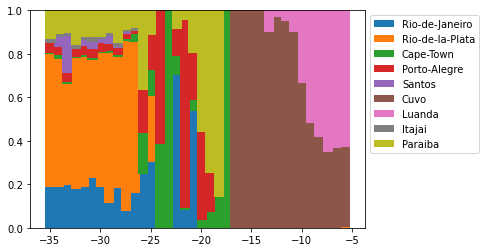

In [337]:
lower_margin = 0

for k, loc in enumerate(labels):
    plt.bar(params_beach['lat_range_america'], post_beach['Africa'][loc][0], label=loc, width=1,
           bottom=lower_margin)
    lower_margin += np.nan_to_num(post_beach['Africa'][loc][0])
    
plt.legend(bbox_to_anchor=(1, 1))

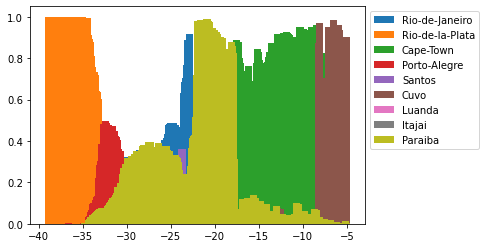

In [134]:
for k, loc in enumerate(labels):
    plt.bar(params_beach['lat_range'], post_beach[loc][0], label=loc)
plt.legend(bbox_to_anchor=(1, 1))